In [89]:
import pandas as pd
import numpy as np

## Data Exploration and Preprocessing

**1) Read the dataset**

The dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, consists of female patients at least 21 years old of Pima Indian heritage.

In [90]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

**2) Display the dataset**

In [91]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mg/deciliter)

**BloodPressure**: Diastolic blood pressure (mmHg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (muU/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**Diabetes Pedigree Function**: A score that represents the likelihood of a person having diabetes based on their family history and ancestry

**3) Data cleaning**

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Although the dataset does not contain missing values, the variables Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI cannot be zero biologically (min = 0). This suggests that missing values in this dataset were likely recorded as zeros. 

To handle these zero (missing) values, I first attempt to drop them.

In [94]:
df_cleaned = df[(df['Glucose'] != 0) & (df['BloodPressure'] != 0) & (df['SkinThickness'] != 0) & (df['Insulin'] != 0) & (df['BMI'] != 0)]
print(f"Shape after dropping missing values: {df_cleaned.shape}")
df_cleaned.describe()

Shape after dropping missing values: (392, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


After dropping missing values, it seems like we have lost about half of the data, so I now attempt to use data imputation to estimate those missing values. 

In [95]:
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_impute] = df[cols_to_impute].replace(0, np.nan)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X = pd.DataFrame(df, columns = cols_to_impute)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator = lr, verbose = 1, max_iter = 50, tol = 1e-10, imputation_order = 'roman', min_value = 1)
ImputedData = imp.fit_transform(X)

Imputed_data = pd.DataFrame(ImputedData)
Imputed_data.columns = cols_to_impute

df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] = Imputed_data[['Glucose', 'BloodPressure', 'SkinThickness', 
                                                                             'Insulin']].round(0).astype(int)
df['BMI'] = Imputed_data['BMI']
df.describe()

[IterativeImputer] Completing matrix with shape (768, 5)
[IterativeImputer] Change: 186.90866263334348, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 6.72737067095796, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 3.187617681234343, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 1.5099920353129654, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 0.7151593965190344, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 0.33870683300834514, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 0.16041417992484241, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 0.08125032892312589, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 0.04143425147622892, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 0.021128584988844068, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 0.010773568512949083, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 0.0054932432646346285, scaled tolerance: 8.46e-08 
[IterativeImputer] Change: 0.002800

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.647135,72.380208,28.769531,151.341146,32.442822,0.471876,33.240885,0.348958
std,3.369578,30.461367,12.132417,9.556134,97.773603,6.880741,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,1.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,88.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.000000,32.093736,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,188.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now the minimum values for variables Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI are not equivalent to zero.

Finally, we check for class imbalance. 

In [96]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

There is a mild class imbalance, but it is not likely a major concern.

## Building Machine Learning Models

**1) Split the data**

In [97]:
from sklearn.model_selection import train_test_split

y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

**2) Building KNN Model**

In [98]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Rescale data st all features are approximately on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_init = KNeighborsClassifier()
knn_init.fit(X_train_scaled, y_train)
train_score = knn_init.score(X_train_scaled, y_train)
test_score = knn_init.score(X_test_scaled, y_test)
print(f"At default k = {5}, KNN training accuracy = {train_score} & test accuracy = {test_score}")

At default k = 5, KNN training accuracy = 0.8094462540716613 & test accuracy = 0.7402597402597403


Fitting 5 folds for each of 25 candidates, totalling 125 fits


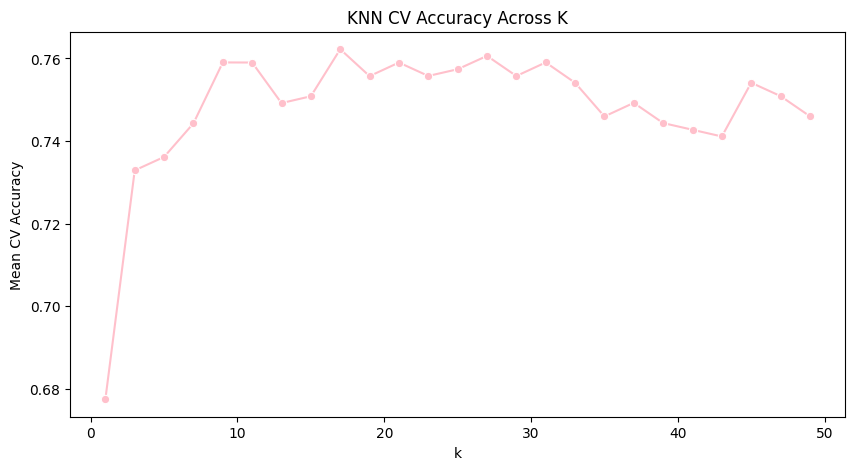

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [i for i in range(1,51) if i % 2 != 0]
}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train_scaled, y_train)

cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize = (10, 5))
sns.lineplot(x = cv_results['param_n_neighbors'], y = cv_results['mean_test_score'], marker = 'o', color = 'pink')
plt.xlabel('k')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN CV Accuracy Across K')
plt.show()

In [100]:
print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

test_accuracy = grid_search.score(X_test_scaled, y_test)
print(f"Test accuracy with best params: {test_accuracy}")

Best parameters found: {'n_neighbors': 17}
Best cross-validation accuracy: 0.7622284419565506
Test accuracy with best params: 0.7532467532467533


**2) Building MLPClassifier Model**

In [101]:
from sklearn.neural_network import MLPClassifier

mlp_init = MLPClassifier(random_state = 42, early_stopping = True)
mlp_init.fit(X_train_scaled, y_train)
print(f"At default settings, MLPClassifier training accuracy = {mlp_init.score(X_train_scaled, y_train)}")
print(f"Test accuracy = {mlp_init.score(X_test_scaled, y_test)}")

At default settings, MLPClassifier training accuracy = 0.7345276872964169
Test accuracy = 0.7142857142857143


In [102]:
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50), (100,100)],
    'max_iter': [200, 500, 1000, 2000], 
    'activation' : ['relu', 'logistic'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01]
}
grid_search = GridSearchCV(estimator = MLPClassifier(random_state = 42, early_stopping = True), param_grid = param_grid, 
                           cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

test_accuracy = grid_search.score(X_test_scaled, y_test)
print(f"Test accuracy with best params: {test_accuracy}")

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found: {'activation': 'logistic', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 200}
Best cross-validation accuracy: 0.7670798347327736
Test accuracy with best params: 0.7662337662337663


The MLPClassifier model demonstrates a slightly higher test accuracy (~ 76.6%) when compared to the KNN model (~ 75.3%). However, due to its black-box nature, we don't know how the MLPClassifier model arrives at its predictions, so I will try to enhance its explainability by displaying feature importances.  

In [103]:
from sklearn.inspection import permutation_importance

best_mlp = grid_search.best_estimator_
result = permutation_importance(best_mlp, X_test_scaled, y_test, n_repeats = 10, random_state = 42, n_jobs = -1)
importances = result.importances_mean

features = X.columns.tolist()
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                    Feature  Importance
1                   Glucose    0.075325
5                       BMI    0.018182
6  DiabetesPedigreeFunction    0.018182
4                   Insulin    0.014286
3             SkinThickness    0.005195
0               Pregnancies    0.001299
2             BloodPressure    0.000000
7                       Age   -0.003896


Among all features, Glucose ranks the highest in importance (~ 0.0753), which aligns well with its central role in diabetes diagnosis. The next most important features are BMI and DiabetesPedigreeFunction (~ 0.0182), though their importances are substantially lower when compared to Glucose. BMI captures obesity-related risk, which is a key factor in the development of type II diabetes; DiabetesPedigreeFunction captures genetic predisposition, which is also clinically relevant. 

In contrast, Insulin and Age demonstrate surprisingly low importances. Regarding Insulin, a potential explanation is that Insulin contains a large proportion of missing values in the original dataset and thus relies heavily on data imputation. Looking back at the summary statistics table before data imputation, the lowest 25% of the measurements are all zero (missing) values. Data imputation introduces uncertainties, which could reduce Insulin's power as a predictive feature. 

Regarding Age, it shows a negative importance, which suggests that it introduces noise or redundant information rather than providing independent predictive value. A potential explanation is the skewed distribution of Age towards the lower end. The median of Age in the dataset is 29, indicating a limited representation of older age groups. Since the risk of type II diabetes generally increases with Age, the limited Age variation could reduce its power as a predictive feature. 